A) Regular Neural Network

Import tensorflow & libraries

Load Fashion MNIST dataset for training

Pre-processing the dataset

Build the model - regular neural network (1D array)

Build the model

Compiling the model

Evaluating the model

Prediction

1. Import tensorflow & libraries

In [ ]:
!pip install -q tensorflow tensorflow-datasets matplotlib

In [ ]:
from __future__ import absolute_import, division, print_function

#Importing Tensorflow and Tensorflow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds

#Helper Libraries
import math
import numpy as np
import matplotlib.pyplot as plt

#Improve Progress Bar Display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

2.5.0


2. Load Fashion MNIST Dataset for training

In [ ]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test'] 

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteZ3NSWN/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteZ3NSWN/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


The class names for each clothing material are not included with the dataset,

Create a list of to store class names which we can use later in plotting the data:

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] 
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Exploring the Data

Before training and testing, let's explore the format of the dataset.

The code below will show that there are 60,000 images in the training set and 10,000 in the testing set:

In [ ]:
num_train_examples = metadata.splits['train'].num_examples #metadata for dataset
num_test_examples = metadata.splits['test'].num_examples

print("Number of training examples: {}".format(num_train_examples))
print("Number of testing examples: {}".format(num_test_examples))

Number of training examples: 60000
Number of testing examples: 10000


3. Pre-Processing the Dataset

The value of each pixel in the image data is an integer in the range [0, 255].

For the model to work properly, these values need to be normalized to the range [0, 1].

So here we create a normalization function, and then apply it to each image in the test and train datasets.

In [ ]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

# The map function applies the normalization function to each element in the train and test datasets

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

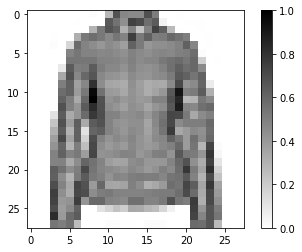

In [ ]:
# Take a single image, and remove the colour dimension by reshaping

for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape((28,28))

# Plotting the image

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

# same size, centered, b&w, white background

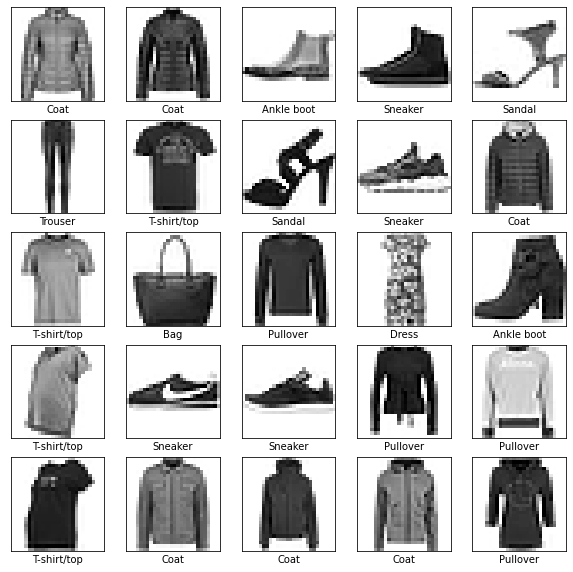

In [ ]:
plt.figure(figsize=(10,10))
i = 0

for (image,label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

4. Build the model - Regular Neural Network

* Setting up layers
* compiling the model

In [ ]:
mnist_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

As seen, the network has 3 input layers:

* input tf.keras.layers.Flatten - This layer transforms a 2-d array (matrix) into a 1-D array of 784 (28 x 28). Think of this layer as lining up the images from a square to one, long line. This layer doesn't learn anything; it simply reshapes the input data.
* "hidden" tf.keras.layers.Dense - A densely connected layer of 128 neurons. Each neuron (otherwise known as a node) takes input from all 784 nodes in the previous (input) layer, weighting that input according to hidden parameters which will be learned during training, and outputs a single value to the next (output) layer.
* output tf.keras.layers.Dense This is a 10 (for 10 items) node softmax layer with each node representing a class of clothing. As in the previous layer, each node takes input from the 128 nodes in the layer before it, weights that input according to learned parameters, and then outputs a value in the form of [0, 1] which of course, represents the probability of the image belonging to that class. The sum of all 10 nodes is 1.

5. Compiling the Model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

* Loss function - An alogrithm for measuring how far the model's outputs are from the desired output. The goal of training is this measure's loss.
* Optimizer - An algorithm for adjusting the inner parameters of the model in order to minimize loss.
* Metrics - Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified:

In [ ]:
mnist_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

First, we define the iteration behavior for the train dataset:

1. Repeat forever by specifying dataset.repeat() (the epochs parameter described below limits how long we perform training).
2. The dataset.shuffle(60000) randomizes the order so our model cannot learn anything from the order of the examples.
3. And dataset.batch(32) tells model.fit to use batches of 32 images and labels when updating the model variables.

In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

6. Train the model

Training is performed by calling the model.fit method:

1. Feed the training data to the model using train_dataset.
2. The model learns to associate images and labels.
3. The epochs=5 parameter limits training to 5 full iterations of the training dataset, so a total of 5 * 60000 = 300000 examples.


In [ ]:
mnist_model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 12s 3ms/step - loss: 0.4954 - accuracy: 0.8249
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3836 - accuracy: 0.8609
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3358 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3120 - accuracy: 0.8856
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2987 - accuracy: 0.8902


After running the 5th epoch on the train dataset

* loss ~28%
* accuracy ~89%

7. Evaluating the model

In [ ]:
test_loss, test_accuracy = mnist_model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))

313/313 [==============================] - 1s 4ms/step - loss: 0.3724 - accuracy: 0.8685


Test dataset:

* loss ~36%
* accuracy ~87%

Looking at our data, the accuracy of the test dataset is similar to the train dataset (87% and 89%).

This is expected since the model was trained on train_dataset. When the model sees images that it hasn’t seen before (in this case, test_dataset), we could have expected the accuracy to be lower.

8. Prediction

In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = mnist_model.predict(test_images)

In [ ]:
predictions.shape

(32, 10)

Here, the model has predicted the 32 answers each with the probability distribution containing the 10 classes.

Let's take a look at several?

* predictions [0] = 4 (pullover)
* predictions [1] = 4 (pullover)
* predictions [2] = 9 (ankle boots)
* predictions [3] = 7 (sneaker)
* predictions [4] = 5 (sandals)
* predictions [31] = 5 (sandals)

In [ ]:
predictions[0]

array([3.1015868e-05, 7.7802139e-07, 1.7717037e-02, 3.6507771e-08,
       9.6940821e-01, 2.4239430e-09, 1.2839914e-02, 3.3340851e-11,
       3.1723132e-06, 4.6461787e-10], dtype=float32)

In [ ]:
np.argmax(predictions[0])

4

So, our model was most confident that the image is a coat, or class_names[4]. We can also check the test label to see this is correct:

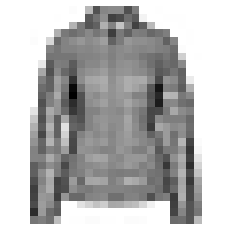

4

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

def showImage(data):
    some_article = data
    some_article_image = some_article.reshape(28, 28) # Reshaping it to get the 28x28 pixels
    plt.imshow(some_article_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

# view the test images to see this if it's correct
showImage(test_images[0])

# check the test label to see this if it's correct
test_labels[0]

Let's plot several images and see their predictions. Note that correct predictions are blue and incorrect predictions are red.

The number gives a percent (out of 100) for the predicted label. Also note that the model can be very wrong despite being very confident.

In [ ]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_labels, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_labels:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f} ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_labels]), color=color)

def plotting_probabilities(i, predictions_array, true_labels):
  predictions_array, true_labels = predictions_array[i], true_labels[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_labels].set_color('blue') # correct predictions

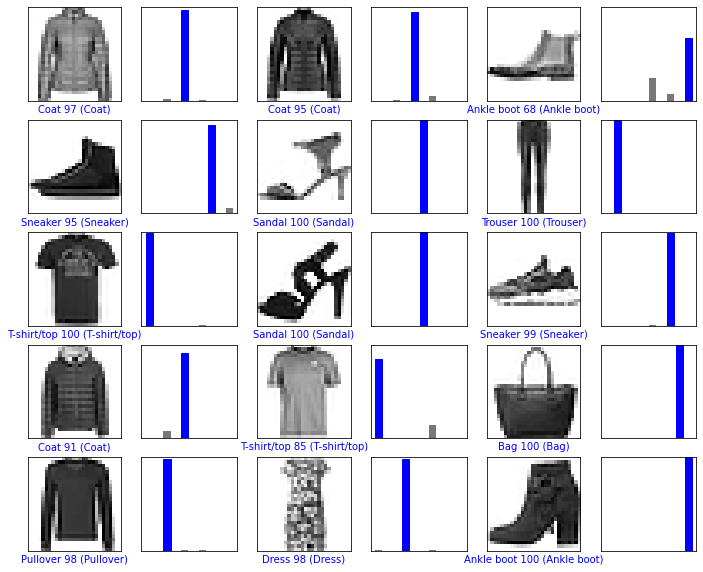

In [ ]:
#Plot the first ____ images, their predicted label, and the true label

num_rows = 5
num_cols = 3

num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plotting_probabilities(i, predictions, test_labels)